In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
from realesrgan import RealESRGANer
from basicsr.archs.rrdbnet_arch import RRDBNet

In [ ]:
!wget https://github.com/xinntao/Real-ESRGAN/releases/download/v0.1.0/RealESRGAN_x4plus.pth -P ../models/

In [2]:
model = RRDBNet(
    num_in_ch=3,
    num_out_ch=3,
    num_feat=64,
    num_block=23,
    num_grow_ch=32,
    scale=4
)

enhancer = RealESRGANer(
    scale=4,
    model=model,
    model_path="../models/RealESRGAN_x4plus.pth",
    tile=256,
    device=torch.device("cuda"),
    half=True
)

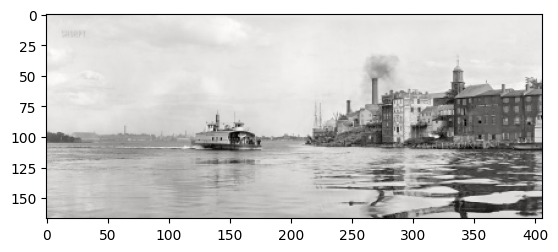

In [5]:
img_path = "../images/source/boat.png"
img = cv2.imread(img_path, cv2.IMREAD_COLOR_RGB)

plt.imshow(img)
plt.show()

In [6]:
upscaled_image, _ = enhancer.enhance(img)

	Tile 1/2
	Tile 2/2


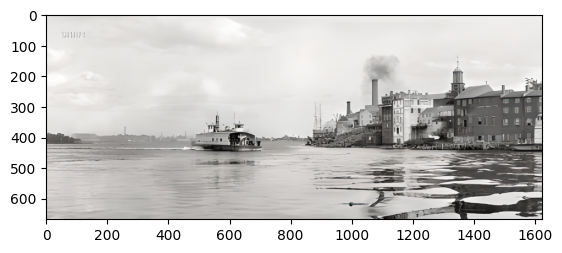

In [7]:
plt.imshow(upscaled_image)

In [ ]:
cv2.imwrite(filename="img_upscaled.jpg", img=upscaled_image[:, :, ::-1])

True